#Exploration of the dataset
Before you start to solve the classification task you should carry out some research to get familiar with the dataset and to decide what features and observations will be useful. Let's do it together.

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
animals = pd.read_csv('train.csv')

First, let's count how many cats and dogs we have in the shelter.

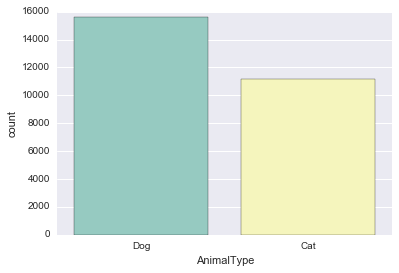

In [6]:
sns.countplot(animals.AnimalType, palette='Set3')

Now, let's see how different outcomes are distributed.

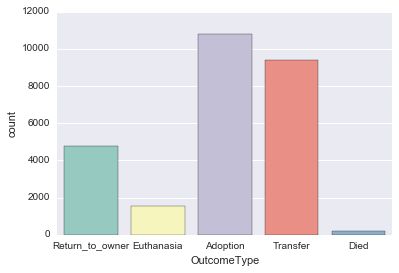

In [7]:
sns.countplot(animals.OutcomeType, palette='Set3')

We can see that adoption and transfer are our leaders (good for poor animals).

We have another column - sex upon outcome. 

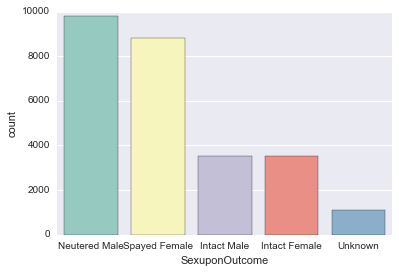

In [8]:
sns.countplot(animals.SexuponOutcome, palette='Set3')

Actually, it contains two types of information: if animal was male or female and if it was neutered/spayed or intact. I hope it is a good idea to divided this column into two

In [9]:
# functions to get new parameters from the column
def get_sex(x):
    x = str(x)
    if x.find('Male') >= 0: return 'male'
    if x.find('Female') >= 0: return 'female'
    return 'unknown'
def get_neutered(x):
    x = str(x)
    if x.find('Spayed') >= 0: return 'neutered'
    if x.find('Neutered') >= 0: return 'neutered'
    if x.find('Intact') >= 0: return 'intact'
    return 'unknown'


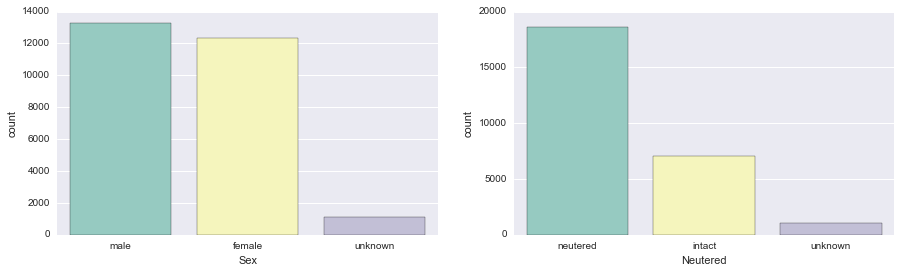

In [10]:
animals['Sex'] = animals.SexuponOutcome.apply(get_sex)
animals['Neutered'] = animals.SexuponOutcome.apply(get_neutered)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
sns.countplot(animals.Sex, palette='Set3', ax=ax1)
sns.countplot(animals.Neutered, palette='Set3', ax=ax2)

Well, it seems like we have approximately equal number of male and female animals, and neutered (or spayed) prevail amongst them.

Also we have information about breed, and some animals has pure or mixed breed. I wonder if  breed purity has some impact on the fate of animal.

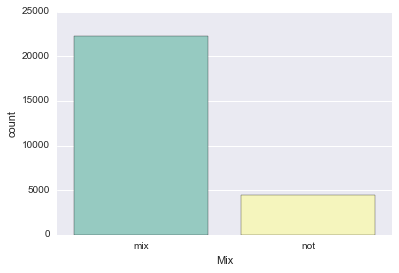

In [11]:
def get_mix(x):
    x = str(x)
    if x.find('Mix') >= 0: return 'mix'
    return 'not'
animals['Mix'] = animals.Breed.apply(get_mix)
sns.countplot(animals.Mix, palette='Set3')

Well, the poor animals from the shelter can not boast of breed purity in most cases.

Now, let's see how different parameters influence on the outcome.

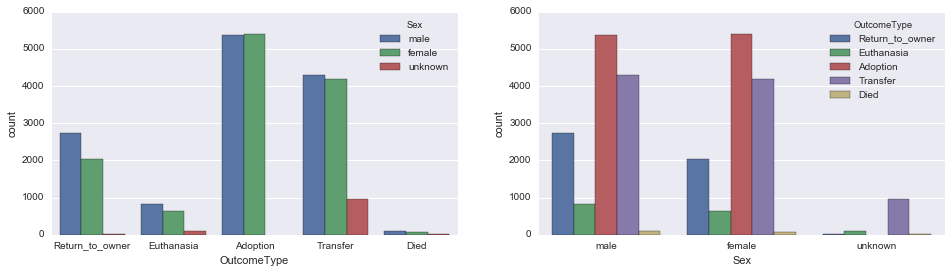

In [12]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=animals, x='OutcomeType',hue='Sex', ax=ax1)
sns.countplot(data=animals, x='Sex',hue='OutcomeType', ax=ax2)

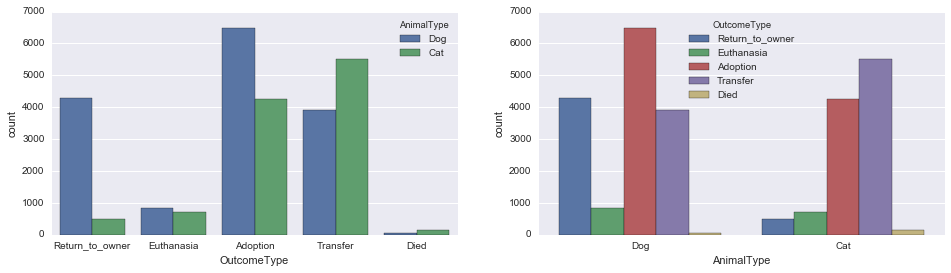

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=animals, x='OutcomeType',hue='AnimalType', ax=ax1)
sns.countplot(data=animals, x='AnimalType',hue='OutcomeType', ax=ax2)

Interesting notice: dogs tend to be returned to owner more often than cats. And cats are transferred more often than dogs.

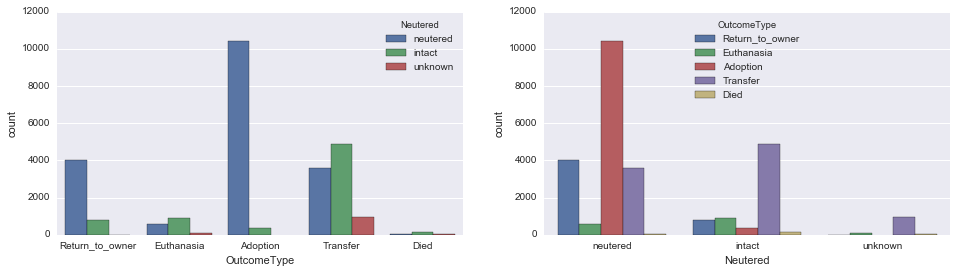

In [14]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=animals, x='OutcomeType',hue='Neutered', ax=ax1)
sns.countplot(data=animals, x='Neutered',hue='OutcomeType', ax=ax2)

Neutered animals have high chances to be adopted, while intact animals are more likely to be transferred.

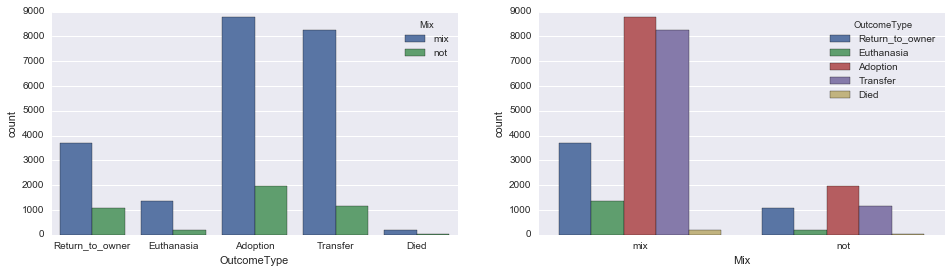

In [15]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=animals, x='OutcomeType',hue='Mix', ax=ax1)
sns.countplot(data=animals, x='Mix',hue='OutcomeType', ax=ax2)

Nothing special. Apparently, my suggestion about mixed breed and its effect on outcome was wrong.

Another one parameter is age, but we have it in different units: years, months, weeks and days. Let's calculate every age in years and see if there is something interesting inside.

In [16]:
def calc_age_in_years(x):
    x = str(x)
    if x == 'nan': return 0
    age = int(x.split()[0])
    if x.find('year') > -1: return age 
    if x.find('month')> -1: return age / 12.
    if x.find('week')> -1: return age / 52.
    if x.find('day')> -1: return age / 365.
    else: return 0

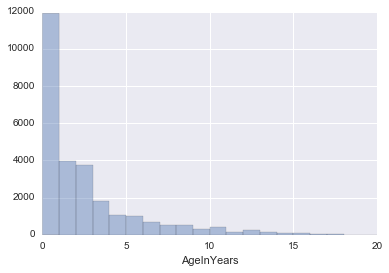

In [17]:
animals['AgeInYears'] = animals.AgeuponOutcome.apply(calc_age_in_years)
sns.distplot(animals.AgeInYears, bins = 20, kde=False)

Most of the animals in the shelter are 0-1 years old. Let's see if age has some effect on outcome.

In [18]:
def calc_age_category(x):
    if x < 3: return 'young'
    if x < 5: return 'young adult'
    if x < 10: return 'adult'
    return 'old'
animals['AgeCategory'] = animals.AgeInYears.apply(calc_age_category)

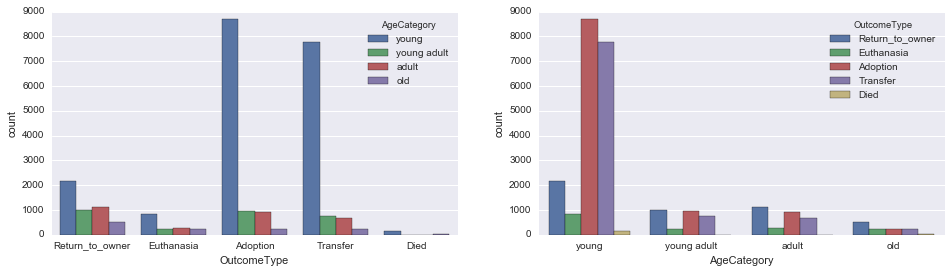

In [19]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=animals, x='OutcomeType',hue='AgeCategory', ax=ax1)
sns.countplot(data=animals, x='AgeCategory',hue='OutcomeType', ax=ax2)

Interesting that young cats and dogs have much higher chances to be adopted or transferred than to be returned to owner or something else, while older animals with approximately equal probability can be adopted, transferred or returned.